In [18]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Churn_Modelling.csv")

In [19]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
data.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
Le= LabelEncoder()
data["Gender"]= Le.fit_transform(data["Gender"])

In [29]:
#One Hot Encoding
Geo = pd.get_dummies(data["Geography"],drop_first=True)

In [35]:
data = pd.concat([data,Geo],axis=1)

In [42]:
X= data.iloc[:,0:9]

In [43]:
X = pd.concat([X,Geo],axis=1)

In [45]:
X.drop("Geography",axis=1,inplace=True)

In [69]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Germany,Spain
0,619,0,42,2,0.00,1,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,0,1
2,502,0,42,8,159660.80,3,1,0,0,0
3,699,0,39,1,0.00,2,0,0,0,0
4,850,0,43,2,125510.82,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,0,0
9996,516,1,35,10,57369.61,1,1,1,0,0
9997,709,0,36,7,0.00,1,0,1,0,0
9998,772,1,42,3,75075.31,2,1,0,1,0


In [46]:
Y = data.iloc[:,10]

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [49]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [78]:
classifer = Sequential() #intialisingthe ANN

In [89]:
#first Hidden Layer
classifer.add(Dense(units=6,kernel_initializer="he_uniform", activation="relu", input_dim = 10))
#classifer.add(Dropout(0.3))

In [80]:
#secound hidden layer
classifer.add(Dense(units=6, kernel_initializer= "he_uniform", activation="relu"))
#classifer.add(Dropout(0.4))

In [81]:
#adding outputlayer
classifer.add(Dense(units= 1, kernel_initializer= "glorot_uniform", activation="sigmoid"))

In [82]:
#compling ANN

classifer.compile(optimizer="Adamax", loss = "binary_crossentropy", metrics= ["accuracy"])

In [83]:
model_history = classifer.fit(X_train,y_train,validation_split=0.33,epochs= 100)

Epoch 1/100
168/168 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6344 - val_loss: 0.6042 - val_accuracy: 0.7573
Epoch 2/100
168/168 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.7811 - val_loss: 0.5467 - val_accuracy: 0.7914
Epoch 3/100
168/168 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7962 - val_loss: 0.5204 - val_accuracy: 0.7944
Epoch 4/100
168/168 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7970 - val_loss: 0.5036 - val_accuracy: 0.7955
Epoch 5/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7966 - val_loss: 0.4918 - val_accuracy: 0.7955
Epoch 6/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7966 - val_loss: 0.4827 - val_accuracy: 0.7959
Epoch 7/100
168/168 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7964 - val_loss: 0.4755 - val_accuracy: 0.7967

In [84]:
#predicting for text set

y_pred = classifer.predict(X_test)
y_pred = (y_pred > 0.5)

In [85]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,y_pred)
cm

array([[1541,   54],
       [ 271,  134]])

In [88]:
score= accuracy_score(y_pred,y_test)
score

0.8375

In [90]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


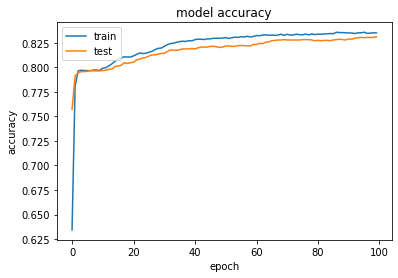

In [95]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

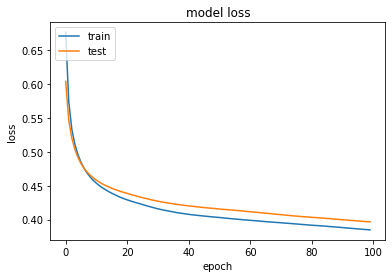

In [96]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()